# I. Problem Framing

- The business objective to be achieved is to get a prediction system that can be used to find out which customers will churn and the factors that occur.


- The output to be generated is a prediction of the churn status of a customer. If you can predict which customer will churn, you can help the marketing team to develop marketing strategies in an effort to avoid losses in the form of losing customers.


- The machine learning approach that is applied this time is supervised learning in the form of classification problems. The system will predict a predetermined label (churn).


- The performance measure that will be used to help determine the quality of the final result is accuracy to determine the percentage of prediction success. Recall and precision will also be used to find out where the prediction error is.


- If the model incorrectly to predicts, the risk that stakeholders can experience is in the form of incorrectly giving promos to customers who do not churn, therefore, the promos provided will be in vain and will increase marketing costs. In addition, customers who actually will churn, but the model predicts that the customer is considered not churn, then these customers will not get the promo. Therefore, the customer may actually quit and this will result in the loss of a customer.

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio
import warnings

warnings.filterwarnings("ignore")

In [2]:
df_ecommerce = pd.read_excel('e-commerce2.xlsx')

## Exploratory Data Analysis

In [3]:
df_ecommerce

CustomerID  Churn  Tenure PreferredLoginDevice  CityTier  \
0          50001      1     4.0         Mobile Phone         3   
1          50002      1     NaN                Phone         1   
2          50003      1     NaN                Phone         1   
3          50004      1     0.0                Phone         3   
4          50005      1     0.0                Phone         1   
...          ...    ...     ...                  ...       ...   
5625       55626      0    10.0             Computer         1   
5626       55627      0    13.0         Mobile Phone         1   
5627       55628      0     1.0         Mobile Phone         1   
5628       55629      0    23.0             Computer         3   
5629       55630      0     8.0         Mobile Phone         1   

      WarehouseToHome PreferredPaymentMode  Gender  HourSpendOnApp  \
0                 6.0           Debit Card  Female             3.0   
1                 8.0                  UPI    Male             3.0   
2                30.0           Debit Card    Male             2.0   
3                15.0           Debit Card    Male             2.0   
4                12.0                   CC    Male             NaN   
...               ...                  ...     ...             ...   
5625             30.0          Credit Card    Male             3.0   
5626             13.0          Credit Card    Male             3.0   
5627             11.0           Debit Card    Male             3.0   
5628              9.0          Credit Card    Male             4.0   
5629             15.0          Credit Card    Male             3.0   

      NumberOfDeviceRegistered    PreferedOrderCat  SatisfactionScore  \
0                            3  Laptop & Accessory                  2   
1                            4              Mobile                  3   
2                            4              Mobile                  3   
3                            4  Laptop & Accessory                  5   
4                            3              Mobile                  5   
...                        ...                 ...                ...   
5625                         2  Laptop & Accessory                  1   
5626                         5             Fashion                  5   
5627                         2  Laptop & Accessory                  4   
5628                         5  Laptop & Accessory                  4   
5629                         2  Laptop & Accessory                  3   

     MaritalStatus  NumberOfAddress  Complain  OrderAmountHikeFromlastYear  \
0           Single                9         1                         11.0   
1           Single                7         1                         15.0   
2           Single                6         1                         14.0   
3           Single                8         0                         23.0   
4           Single                3         0                         11.0   
...            ...              ...       ...                          ...   
5625       Married                6         0                         18.0   
5626       Married                6         0                         16.0   
5627       Married                3         1                         21.0   
5628       Married                4         0                         15.0   
5629       Married                4         0                         13.0   

      CouponUsed  OrderCount  DaySinceLastOrder  CashbackAmount  
0            1.0         1.0                5.0          159.93  
1            0.0         1.0                0.0          120.90  
2            0.0         1.0                3.0          120.28  
3            0.0         1.0                3.0          134.07  
4            1.0         1.0                3.0          129.60  
...          ...         ...                ...             ...  
5625         1.0         2.0                4.0          150.71  
5626         1.0         2.0  

In [4]:
df_ecommerce.describe()

CustomerID        Churn       Tenure     CityTier  WarehouseToHome  \
count   5630.000000  5630.000000  5366.000000  5630.000000      5379.000000   
mean   52815.500000     0.168384    10.189899     1.654707        15.639896   
std     1625.385339     0.374240     8.557241     0.915389         8.531475   
min    50001.000000     0.000000     0.000000     1.000000         5.000000   
25%    51408.250000     0.000000     2.000000     1.000000         9.000000   
50%    52815.500000     0.000000     9.000000     1.000000        14.000000   
75%    54222.750000     0.000000    16.000000     3.000000        20.000000   
max    55630.000000     1.000000    61.000000     3.000000       127.000000   

       HourSpendOnApp  NumberOfDeviceRegistered  SatisfactionScore  \
count     5375.000000               5630.000000        5630.000000   
mean         2.931535                  3.688988           3.066785   
std          0.721926                  1.023999           1.380194   
min          0.000000                  1.000000           1.000000   
25%          2.000000                  3.000000           2.000000   
50%          3.000000                  4.000000           3.000000   
75%          3.000000                  4.000000           4.000000   
max          5.000000                  6.000000           5.000000   

       NumberOfAddress     Complain  OrderAmountHikeFromlastYear   CouponUsed  \
count      5630.000000  5630.000000                  5365.000000  5374.000000   
mean          4.214032     0.284902                    15.707922     1.751023   
std           2.583586     0.451408                     3.675485     1.894621   
min           1.000000     0.000000                    11.000000     0.000000   
25%           2.000000     0.000000                    13.000000     1.000000   
50%           3.000000     0.000000                    15.000000     1.000000   
75%           6.000000     1.000000                    18.000000     2.000000   
max          22.000000     1.000000                    26.000000    16.000000   

        OrderCount  DaySinceLastOrder  CashbackAmount  
count  5372.000000        5323.000000     5630.000000  
mean      3.008004           4.543491      177.223030  
std       2.939680           3.654433       49.207036  
min       1.000000           0.000000        0.000000  
25%       1.000000           2.000000      145.770000  
50%       2.000000           3.000000      163.280000  
75%       3.000000           7.000000      196.392500  
max      16.000000          46.000000      324.990000

In [5]:
df_ecommerce.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

There are 5630 rows and 20 columns in this dataset, which consists of 5 categorical columns and 15 numerical columns

In [6]:
# Checking duplicate value from the datasets
df_duplicate = df_ecommerce.duplicated()
df_duplicate[df_duplicate == True].value_counts()

Series([], dtype: int64)

There is no duplicate data on datasets

In [7]:
df_ecommerce.drop('CustomerID',axis='columns',inplace=True)

Drop the CustomerID column because it will definitely not be used as a feature

#### Feature Engineering - Adding new variable

In [8]:
# Generating new features from cashback amount divided order count
df_ecommerce['avg_cashbk_per_order'] = df_ecommerce['CashbackAmount'] / df_ecommerce['OrderCount']

In [9]:
# Checking missing values 
df_ecommerce.isna().sum()

Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
avg_cashbk_per_order           258
dtype: int64

In [10]:
# Calculate the percentage of each missing value
for i in range(len(df_ecommerce.columns)):
    missing_data = df_ecommerce[df_ecommerce.columns[i]].isna().sum()
    perc = missing_data / len(df_ecommerce) * 100
    print('>%d,  Missing value: %d, percentage %.2f%%' % (i, missing_data, perc))

>0,  Missing value: 0, percentage 0.00%
>1,  Missing value: 264, percentage 4.69%
>2,  Missing value: 0, percentage 0.00%
>3,  Missing value: 0, percentage 0.00%
>4,  Missing value: 251, percentage 4.46%
>5,  Missing value: 0, percentage 0.00%
>6,  Missing value: 0, percentage 0.00%
>7,  Missing value: 255, percentage 4.53%
>8,  Missing value: 0, percentage 0.00%
>9,  Missing value: 0, percentage 0.00%
>10,  Missing value: 0, percentage 0.00%
>11,  Missing value: 0, percentage 0.00%
>12,  Missing value: 0, percentage 0.00%
>13,  Missing value: 0, percentage 0.00%
>14,  Missing value: 265, percentage 4.71%
>15,  Missing value: 256, percentage 4.55%
>16,  Missing value: 258, percentage 4.58%
>17,  Missing value: 307, percentage 5.45%
>18,  Missing value: 0, percentage 0.00%
>19,  Missing value: 258, percentage 4.58%


There are 7 columns whose data has missing values, and the percentage of these missing values range from 4.53% - 5.45%,

#### Numerical Features

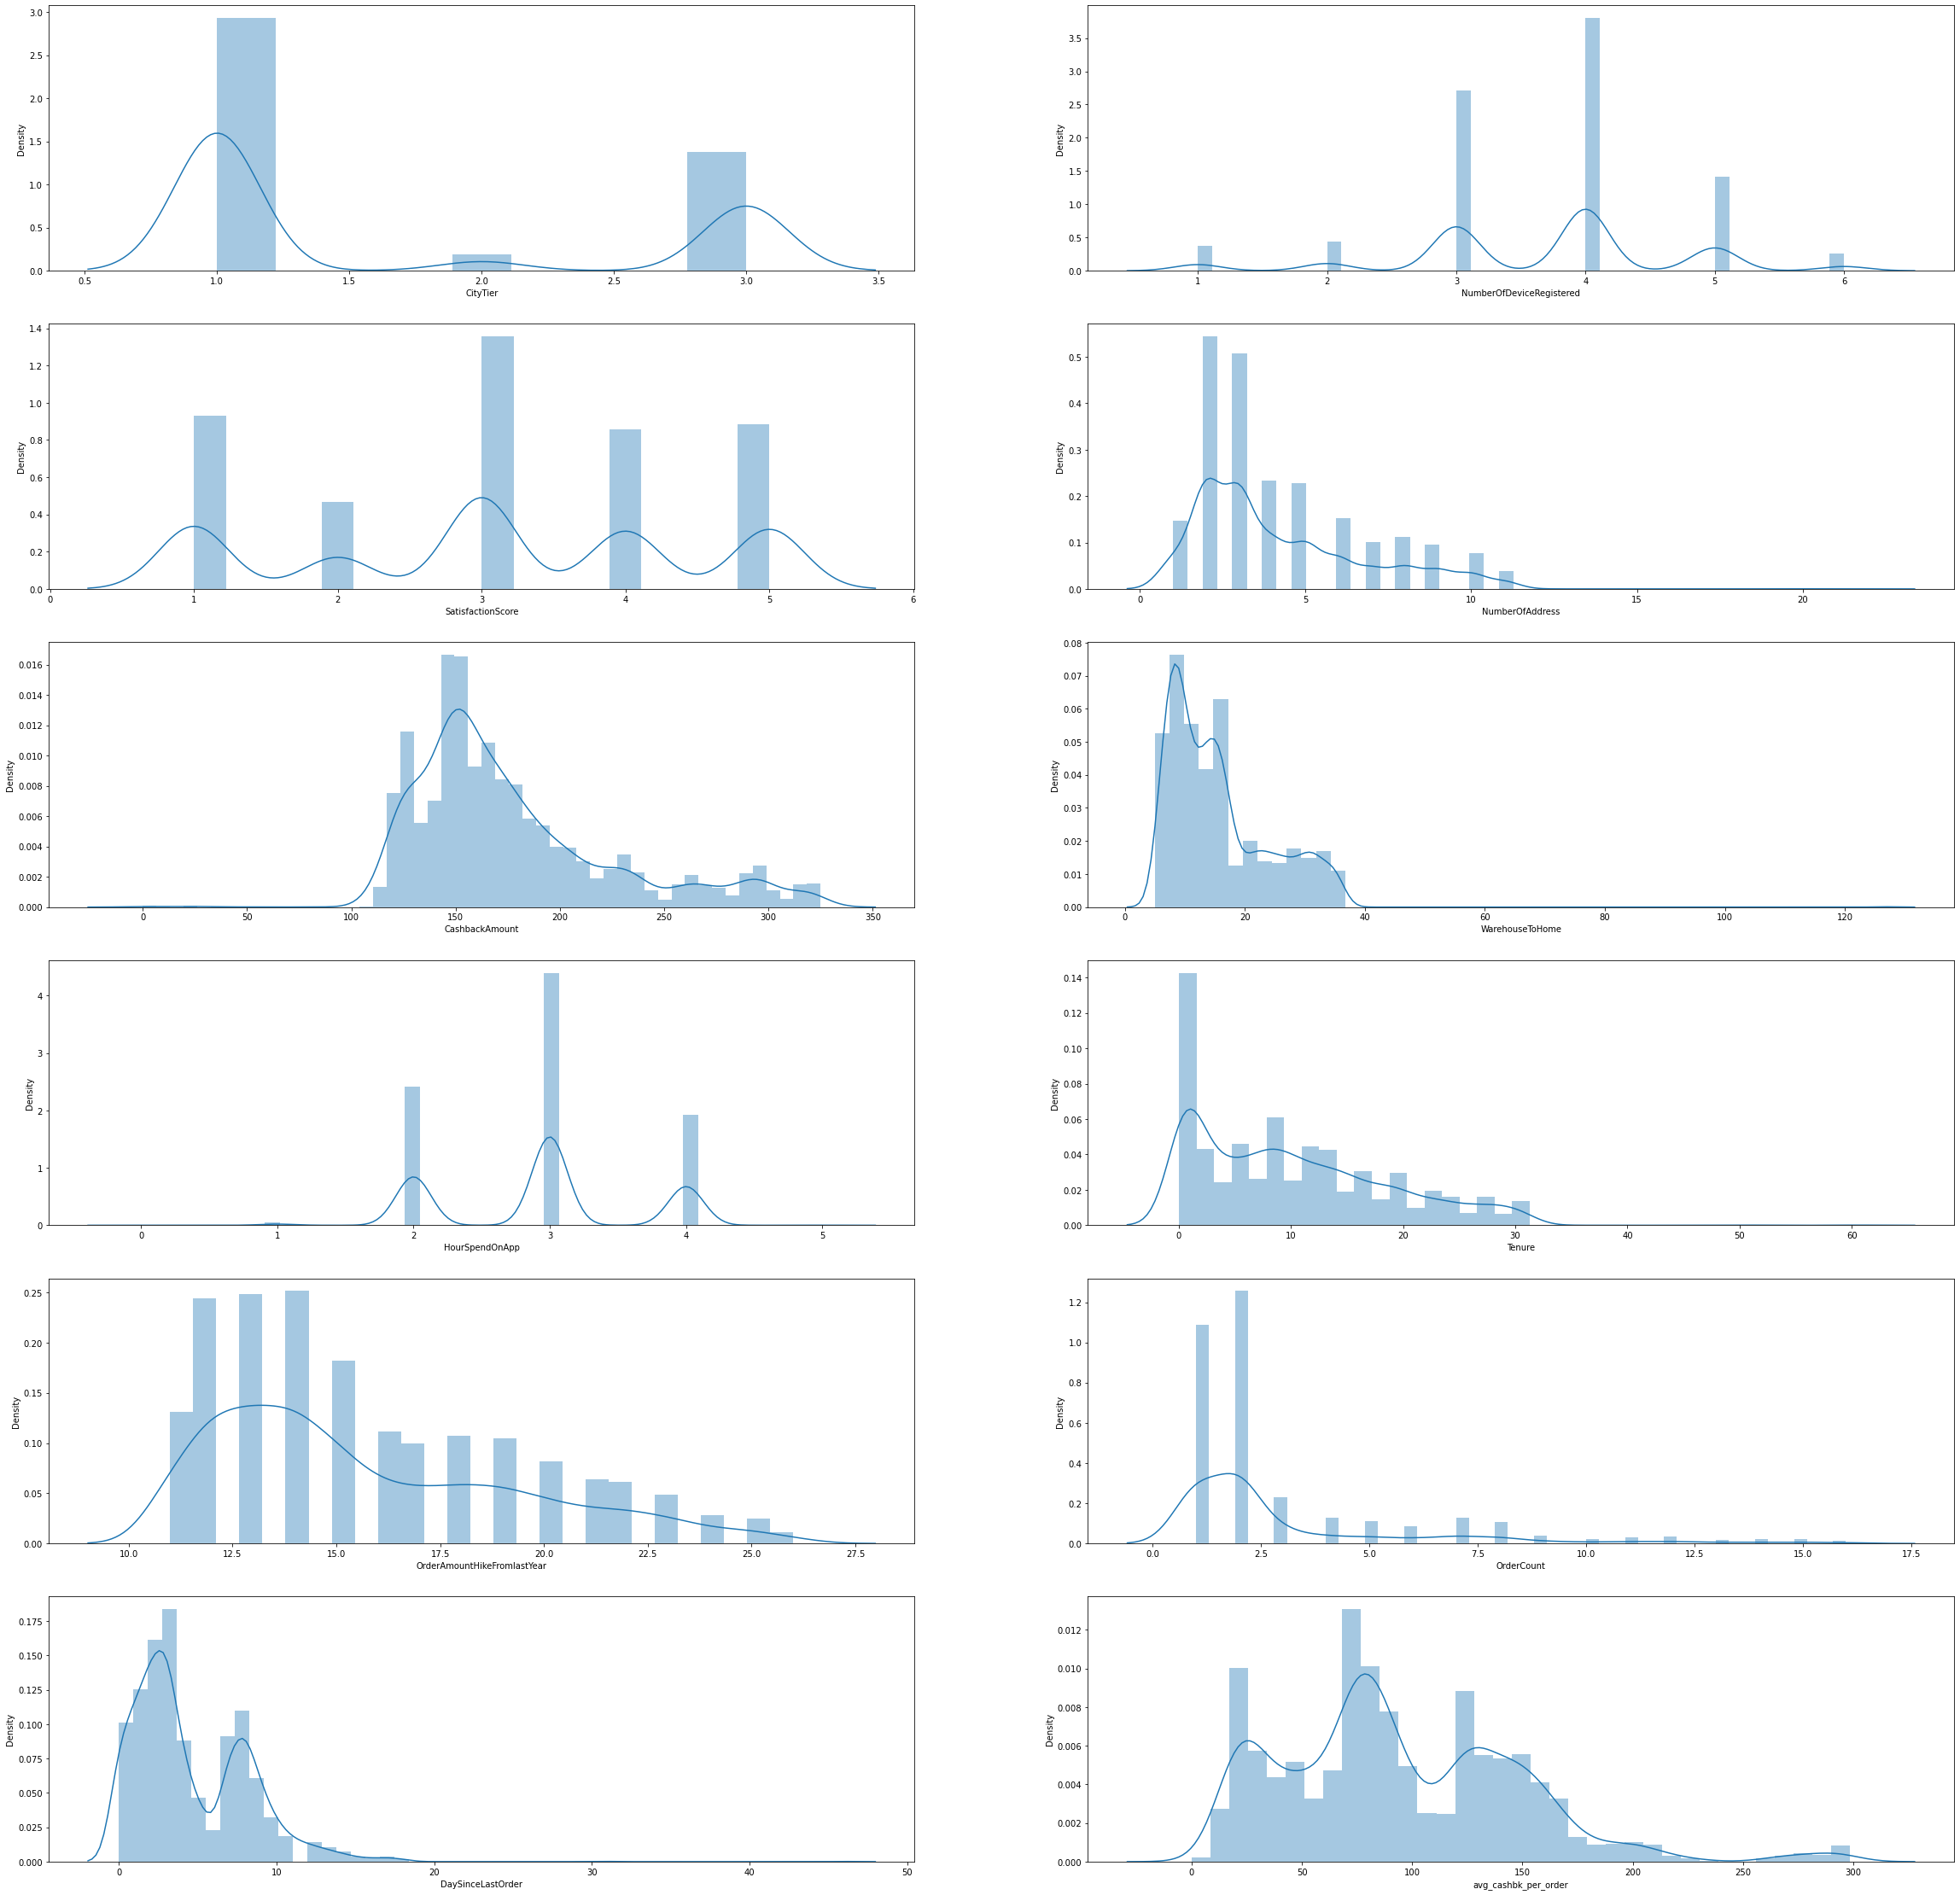

In [11]:
# The distribution of numerical variables
num = ['CityTier','NumberOfDeviceRegistered', 
            'SatisfactionScore', 'NumberOfAddress', 'CashbackAmount',
           'WarehouseToHome', 'HourSpendOnApp', 'Tenure','OrderAmountHikeFromlastYear',
               'OrderCount', 'DaySinceLastOrder', 'avg_cashbk_per_order']
fig, ax = plt.subplots(6, 2, figsize=(40, 40))
for i, subplot in zip(num, ax.flatten()):
    sns.distplot(df_ecommerce[i], ax=subplot)

The distribution of numerical variables tends to be skewed. To solve the missing value, we can use the median

In [12]:
fig = px.scatter(data_frame=df_ecommerce,
                 x='Tenure',
                 y='avg_cashbk_per_order',
                 color='Churn')
fig.show()

- Customers who have a short tenure and the average amount of cashback per order is low will tend to churned.
- Vice versa, customers with the longer tenure tend to be more loyal

#### Binary Categorical Features

In [13]:
# Checking the categorical column that has two variable values
columns = df_ecommerce.columns
binary_cols = []
for col in columns:
    if df_ecommerce[col].value_counts().shape[0] == 2:
        binary_cols.append(col)
        
binary_cols

['Churn', 'Gender', 'Complain']

There is a categorical column that has two variable values (or class)

#### Exploring Categorical Features

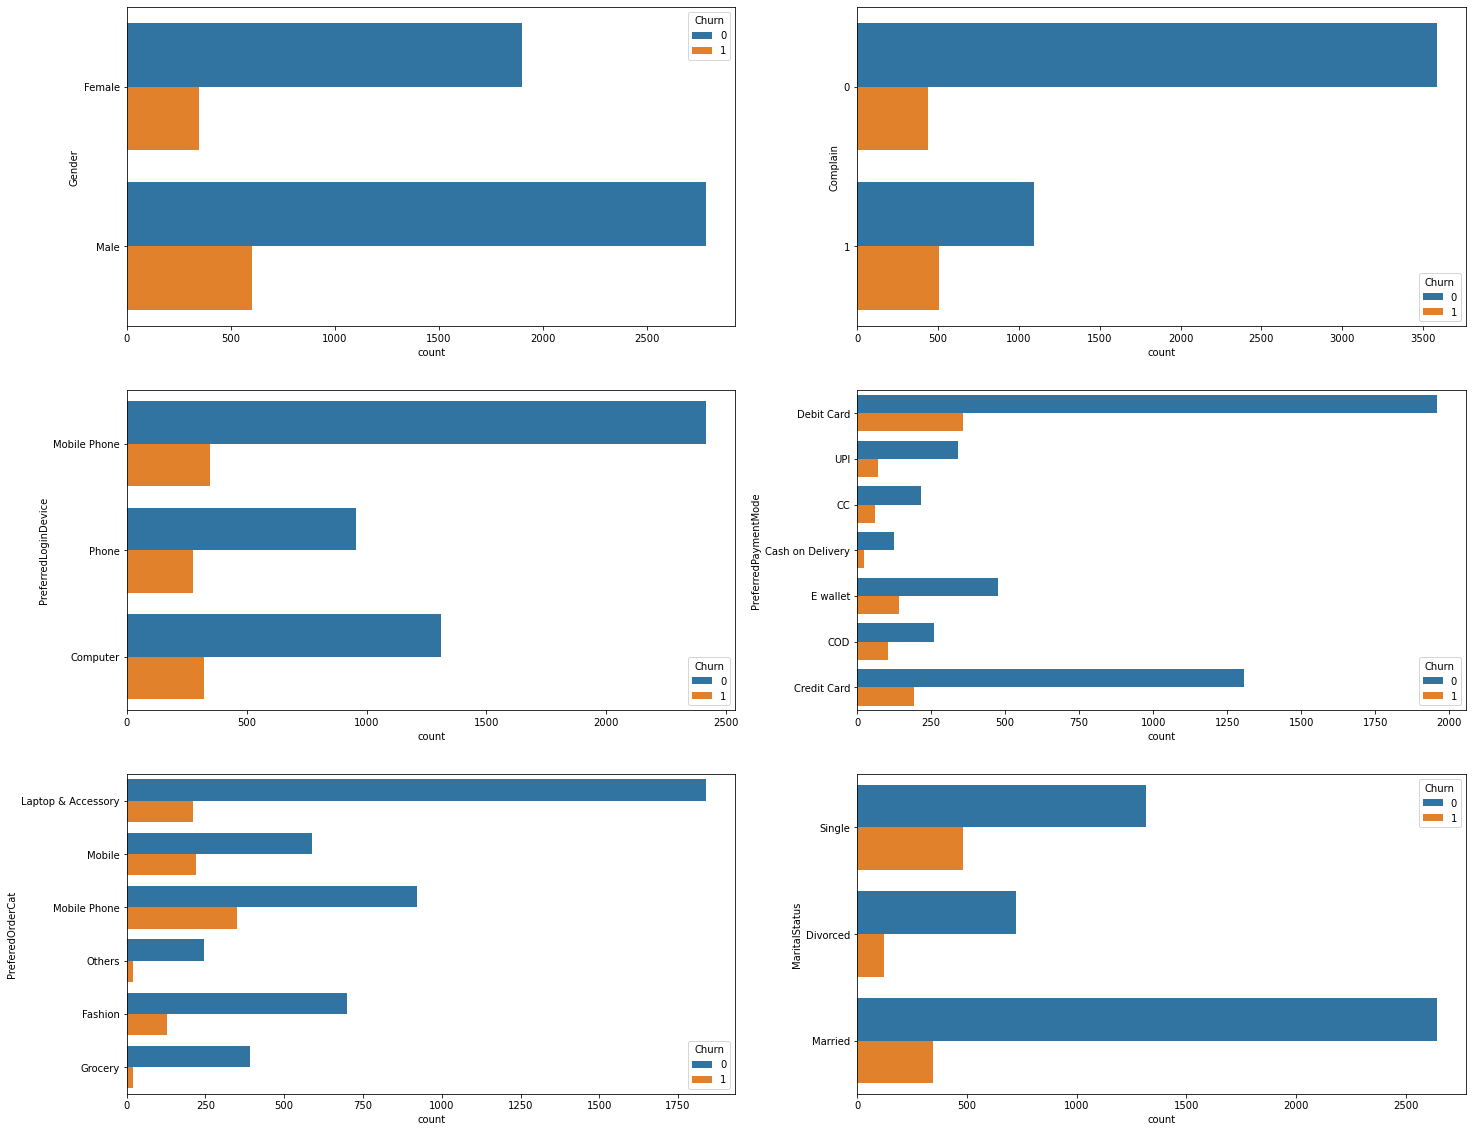

In [14]:
ctgs = ['Gender', 'Complain', 'PreferredLoginDevice','PreferredPaymentMode',
        'PreferedOrderCat', 'MaritalStatus']

fig, ax = plt.subplots(3, 2, figsize=(24,20))
for ix, ctg in enumerate(ctgs):
    sns.countplot(y=ctg, hue='Churn', data=df_ecommerce, ax=ax.flatten()[ix])

- In the Gender category, it can be seen that the male gender churns more than the female gender but the male gender is the majority of this e-commerce user.
- In the complaints category, it can be seen that slightly more people who complain are churn than those who do not complain.    
- in the Preferred Login Device category, it can be seen that customers use mobile phone devices more, and people churn on  average using mobile phone and computer devices.
- In the Preferred Payment Mode category, it can be seen that customers use the debit card payment method more but also make more churn in the debit card payment method compared to others.
- In the Cat Preferred Order category, it can be seen that customers who churn more are customers who buy electronic equipment such as laptop, mobile, and mobile phone.
- In the marital status category, it can be seen that our customers are mostly married, and customers who do more churn are single customers.

#### Analysing Churn by Each Variable

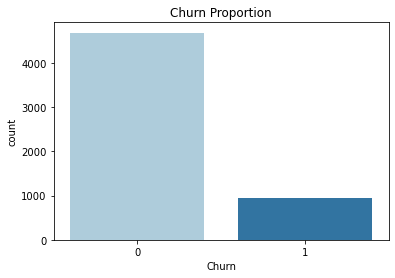

In [15]:
sns.countplot(x='Churn',
              data=df_ecommerce,
              palette='Paired')
plt.title('Churn Proportion');

In [16]:
df_ecommerce['Churn'].value_counts()

0    4682
1     948
Name: Churn, dtype: int64

There is an imbalanced class distribution on the target variable. Positive class (Churn=1) is much less than negative class (Churn=0). Imbalanced class distributions influence the performance of a machine learning model negatively. We will use upsampling or downsampling to overcome this issue.

In [17]:
# Percentage of customer churn
Churn_perc = round((df_ecommerce['Churn'][df_ecommerce['Churn']==1].count()*100/df_ecommerce['Churn'][df_ecommerce['Churn']==0].count()),2)
print('The average customer churn is:', Churn_perc,'%')

The average customer churn is: 20.25 %


Source : https://developers.google.com/machine-learning/data-prep/construct/sampling-splitting/imbalanced-data

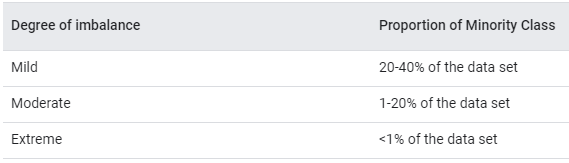

Based on the 'Proportion of Minority Class', the class imbalance that occurs is in the Mild category, which can still do downsampling to the majority class

In [18]:
df_ecommerce[['Churn','Tenure','CityTier','NumberOfDeviceRegistered', 
            'SatisfactionScore', 'NumberOfAddress', 'CashbackAmount'
             ,'WarehouseToHome', 'HourSpendOnApp','OrderAmountHikeFromlastYear',
               'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'avg_cashbk_per_order']].groupby(['Churn']).mean()

Tenure  CityTier  NumberOfDeviceRegistered  SatisfactionScore  \
Churn                                                                     
0      11.502334  1.619821                  3.639257           3.001282   
1       3.379469  1.827004                  3.934599           3.390295   

       NumberOfAddress  CashbackAmount  WarehouseToHome  HourSpendOnApp  \
Churn                                                                     
0             4.162965      180.635203        15.353931        2.925530   
1             4.466245      160.370928        17.134259        2.961798   

       OrderAmountHikeFromlastYear  CouponUsed  OrderCount  DaySinceLastOrder  \
Churn                                                                           
0                        15.724893    1.758232    3.046601           4.807406   
1                        15.627409    1.717021    2.823656           3.236018   

       avg_cashbk_per_order  
Churn                        
0                 95.576332  
1                 88.139500

#### Outliers

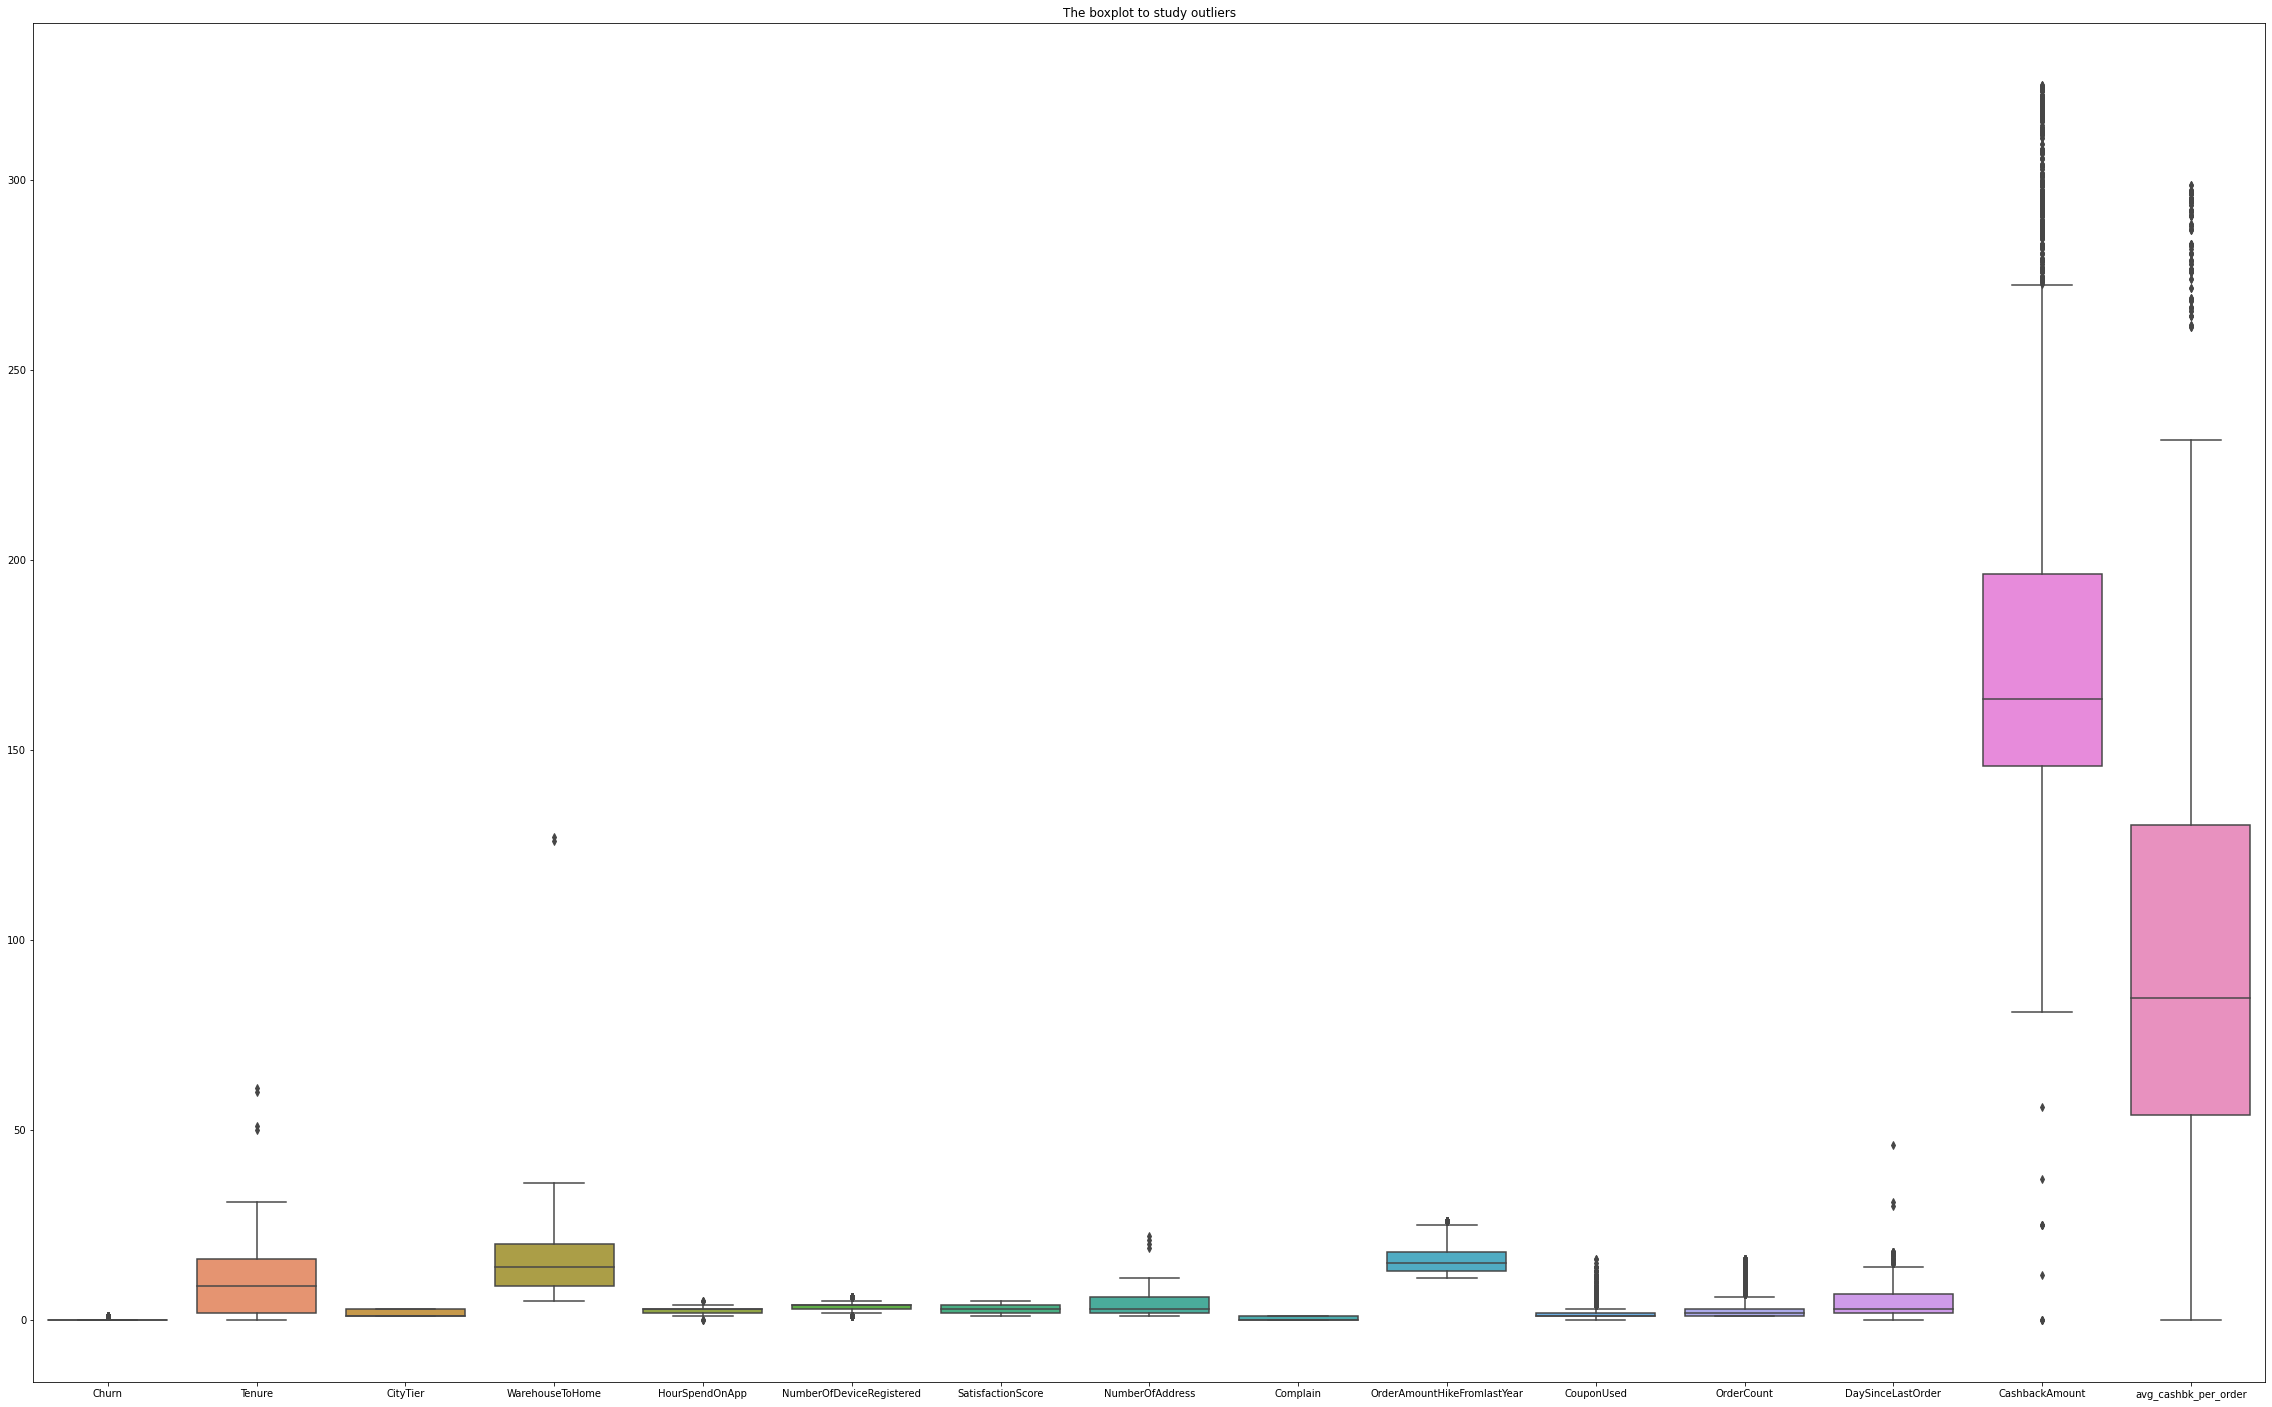

In [19]:
plt.figure(figsize=(40,25))
sns.boxplot(data=df_ecommerce)
plt.title('The boxplot to study outliers');

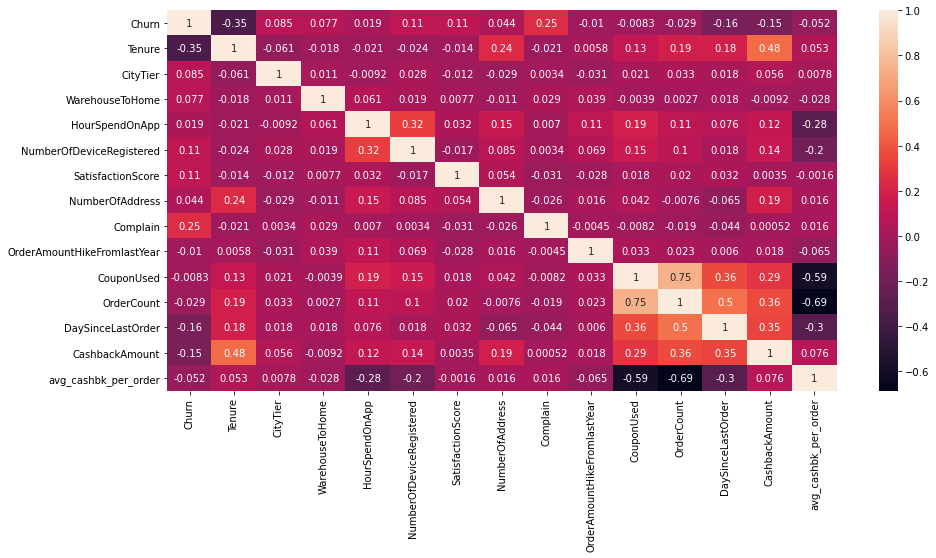

In [20]:
plt.figure(figsize=(15,7))
sns.heatmap(df_ecommerce.corr(), annot=True);

CouponUsed and OrderCount variables indicate that they have multicollinearity, so the approach we take is to take out CouponUsed as a feature

## Data Preprocessing

#### Handle missing value 
We handle missing value with median, because the graph showed skewed distribution 

In [21]:
for i in df_ecommerce.columns:
    if df_ecommerce[i].isnull().sum() > 0:
        df_ecommerce[i].fillna(df_ecommerce[i].median(),inplace=True)

In [22]:
df_ecommerce.isna().sum()

Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
avg_cashbk_per_order           0
dtype: int64

#### Splitting

In [23]:
from sklearn.model_selection import train_test_split

X = df_ecommerce.drop(['Churn'], axis=1)
y = df_ecommerce['Churn']
    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=14, stratify = y)

#### Downsampling

We use downsampling with RandomUnderSampler to handle imbalance data

In [24]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler()
X_train_under, y_train_under = rus.fit_resample(X_train, y_train)

In [25]:
X_train_under.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1516 entries, 0 to 1515
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Tenure                       1516 non-null   float64
 1   PreferredLoginDevice         1516 non-null   object 
 2   CityTier                     1516 non-null   int64  
 3   WarehouseToHome              1516 non-null   float64
 4   PreferredPaymentMode         1516 non-null   object 
 5   Gender                       1516 non-null   object 
 6   HourSpendOnApp               1516 non-null   float64
 7   NumberOfDeviceRegistered     1516 non-null   int64  
 8   PreferedOrderCat             1516 non-null   object 
 9   SatisfactionScore            1516 non-null   int64  
 10  MaritalStatus                1516 non-null   object 
 11  NumberOfAddress              1516 non-null   int64  
 12  Complain                     1516 non-null   int64  
 13  OrderAmountHikeFro

In [26]:
y_train_under.value_counts()

0    758
1    758
Name: Churn, dtype: int64

In [27]:
X_test.shape

(1126, 19)

We need to encode all categorical features, and rescale the numerical features

In [28]:
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler, RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from catboost import CatBoostClassifier, Pool
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.base import BaseEstimator, TransformerMixin

ctg_cols = ['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender',
           'PreferedOrderCat', 'MaritalStatus']

num_cols = ['CityTier','NumberOfDeviceRegistered', 
            'SatisfactionScore', 'NumberOfAddress', 'CashbackAmount',
           'WarehouseToHome', 'HourSpendOnApp', 'Tenure','OrderAmountHikeFromlastYear',
               'OrderCount', 'DaySinceLastOrder', 'avg_cashbk_per_order', 'Complain']


full_pipeline = ColumnTransformer([
    ('ctg_transformer', OneHotEncoder(), ctg_cols),
    ('num_transformer', RobustScaler(), num_cols)
])

full_pipeline_log = Pipeline([
    ('full_pipeline',full_pipeline),
    ('log_reg',LogisticRegression())
])

full_pipeline_knn = Pipeline([
    ('full_pipeline',full_pipeline),
    ('knn',KNeighborsClassifier())
])

full_pipeline_dt = Pipeline([
    ('full_pipeline',full_pipeline),
    ('dt',DecisionTreeClassifier())
])

full_pipeline_ada = Pipeline([
    ('full_pipeline',full_pipeline),
    ('ada',AdaBoostClassifier())
])

full_pipeline_cb = Pipeline([
    ('full_pipeline',full_pipeline),
    ('cb',CatBoostClassifier())
])

In [29]:
pd.set_option('display.max_columns', None)
df = pd.DataFrame(full_pipeline.fit_transform(X_train_under, y_train_under))
df

0    1    2    3    4    5    6    7    8    9    10   11   12   13  \
0     1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0   
1     0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0   
2     0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0   
3     1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0   
4     0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  1.0  0.0   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
1511  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0   
1512  1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  1.0  0.0   
1513  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0   
1514  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0   
1515  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0   

       14   15   16   17   18   19   20   21   22   23    24        25  \
0     0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0 -1.0 -1.0 -0.50 -0.615612   
1     0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0 -1.0 -1.0  0.50  0.990963   
2     0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.5  0.0 -0.5 -0.25 -0.108950   
3     0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.5  1.0 -1.0  2.00  3.241844   
4     0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0 -1.0 -1.0 -0.50  0.618880   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   ...       ...   
1511  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.5  0.00 -0.348905   
1512  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0 -1.0  0.5 -0.25  1.302803   
1513  1.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  1.0  0.0  1.50 -0.025221   
1514  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.50  2.172972   
1515  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0 -1.0  0.0 -0.25 -0.414254   

            26   27        28   29   30        31        32   33  
0     0.000000 -1.0  1.000000  0.8 -0.5  0.666667  0.624758  0.0  
1     1.000000  0.0  0.727273  1.0  4.5 -0.333333 -1.035038  0.0  
2     0.000000  0.0 -0.363636 -0.4 -0.5  0.166667  1.012968  0.0  
3    -0.416667  0.0  2.363636  0.0  0.5  0.000000  0.310716  0.0  
4     0.083333 -1.0  0.181818 -0.8 -0.5  0.500000  1.570638  0.0  
...        ...  ...       ...  ...  ...       ...       ...  ...  
1511  0.083333  0.0 -0.363636 -0.4  0.0 -0.333333 -0.247501  0.0  
1512  1.750000 -1.0  0.454545 -0.6  3.5  0.000000 -0.944250  1.0  
1513  0.083333 -1.0  0.090909 -0.4 -0.5  0.000000  1.077122  0.0  
1514  0.666667  0.0 -0.363636 -0.4  3.0  0.833333 -0.813425  1.0  
1515 -0.250000 -1.0 -0.454545 -0.4  0.0 -0.166667 -0.272537  1.0  

[1516 rows x 34 columns]

## Model Training

We'll select one of these algorithms :

1. Logistic Regression
2. Decision Tree
3. K-Nearest Neighbor
4. AdaBoost
5. CatBoost

In [30]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

warnings.filterwarnings('ignore')

models = [full_pipeline_log, full_pipeline_dt, full_pipeline_knn, full_pipeline_ada, full_pipeline_cb]

# prepare CV result summary table
df_results = pd.DataFrame()

for pipeline_ in models:
    current_step_name = list(pipeline_.named_steps.keys())[1]
    cv_scores = cross_validate(pipeline_,X_train_under,y_train_under, cv=5, scoring=('accuracy',
                                                                           'precision',
                                                                           'recall', 'f1', 'roc_auc'), 
                               return_train_score=True)
    df_results = df_results.append({
        'Model': pipeline_.named_steps[current_step_name].__class__.__name__,
        'Accuracy (train)': cv_scores['train_accuracy'].mean(),
        'Accuracy (val)': cv_scores['test_accuracy'].mean(),
        'Precision (train)': cv_scores['train_precision'].mean(),
        'Precision (val)': cv_scores['test_precision'].mean(),
        'Recall (train)': cv_scores['train_recall'].mean(),
        'Recall (val)': cv_scores['test_recall'].mean(),
        'F1 (train)': cv_scores['train_f1'].mean(),
        'F1 (val)': cv_scores['test_f1'].mean(),
        'roc_auc (train)': cv_scores['train_roc_auc'].mean(),
        'roc_auc (val)': cv_scores['test_roc_auc'].mean()
    }, ignore_index=True)
    
df_results

Learning rate set to 0.011184
0:	learn: 0.6871786	total: 148ms	remaining: 2m 27s
1:	learn: 0.6807982	total: 150ms	remaining: 1m 14s
2:	learn: 0.6745538	total: 151ms	remaining: 50.3s
3:	learn: 0.6691309	total: 153ms	remaining: 38.1s
4:	learn: 0.6635748	total: 155ms	remaining: 30.8s
5:	learn: 0.6578648	total: 157ms	remaining: 25.9s
6:	learn: 0.6533403	total: 158ms	remaining: 22.4s
7:	learn: 0.6492593	total: 160ms	remaining: 19.9s
8:	learn: 0.6439738	total: 162ms	remaining: 17.9s
9:	learn: 0.6388420	total: 164ms	remaining: 16.3s
10:	learn: 0.6330275	total: 166ms	remaining: 14.9s
11:	learn: 0.6272956	total: 168ms	remaining: 13.9s
12:	learn: 0.6230322	total: 170ms	remaining: 12.9s
13:	learn: 0.6179198	total: 172ms	remaining: 12.1s
14:	learn: 0.6141448	total: 174ms	remaining: 11.4s
15:	learn: 0.6115109	total: 175ms	remaining: 10.8s
16:	learn: 0.6076992	total: 177ms	remaining: 10.2s
17:	learn: 0.6026200	total: 179ms	remaining: 9.74s
18:	learn: 0.5981223	total: 181ms	remaining: 9.33s
19:	learn

222:	learn: 0.3201891	total: 505ms	remaining: 1.76s
223:	learn: 0.3194939	total: 507ms	remaining: 1.76s
224:	learn: 0.3189860	total: 509ms	remaining: 1.75s
225:	learn: 0.3183498	total: 510ms	remaining: 1.75s
226:	learn: 0.3177174	total: 512ms	remaining: 1.74s
227:	learn: 0.3174109	total: 513ms	remaining: 1.74s
228:	learn: 0.3170733	total: 515ms	remaining: 1.73s
229:	learn: 0.3163132	total: 517ms	remaining: 1.73s
230:	learn: 0.3156018	total: 519ms	remaining: 1.73s
231:	learn: 0.3150321	total: 520ms	remaining: 1.72s
232:	learn: 0.3147474	total: 522ms	remaining: 1.72s
233:	learn: 0.3140893	total: 523ms	remaining: 1.71s
234:	learn: 0.3134484	total: 525ms	remaining: 1.71s
235:	learn: 0.3126299	total: 526ms	remaining: 1.7s
236:	learn: 0.3123116	total: 532ms	remaining: 1.71s
237:	learn: 0.3119620	total: 534ms	remaining: 1.71s
238:	learn: 0.3114839	total: 536ms	remaining: 1.71s
239:	learn: 0.3109035	total: 538ms	remaining: 1.7s
240:	learn: 0.3104594	total: 539ms	remaining: 1.7s
241:	learn: 0.3

413:	learn: 0.2375958	total: 848ms	remaining: 1.2s
414:	learn: 0.2372176	total: 850ms	remaining: 1.2s
415:	learn: 0.2369199	total: 852ms	remaining: 1.2s
416:	learn: 0.2363472	total: 854ms	remaining: 1.19s
417:	learn: 0.2360271	total: 856ms	remaining: 1.19s
418:	learn: 0.2357931	total: 857ms	remaining: 1.19s
419:	learn: 0.2354339	total: 859ms	remaining: 1.19s
420:	learn: 0.2351434	total: 861ms	remaining: 1.18s
421:	learn: 0.2348144	total: 863ms	remaining: 1.18s
422:	learn: 0.2343064	total: 864ms	remaining: 1.18s
423:	learn: 0.2338522	total: 866ms	remaining: 1.18s
424:	learn: 0.2335877	total: 868ms	remaining: 1.17s
425:	learn: 0.2331378	total: 870ms	remaining: 1.17s
426:	learn: 0.2328733	total: 871ms	remaining: 1.17s
427:	learn: 0.2323043	total: 873ms	remaining: 1.17s
428:	learn: 0.2319071	total: 874ms	remaining: 1.16s
429:	learn: 0.2316459	total: 876ms	remaining: 1.16s
430:	learn: 0.2313537	total: 877ms	remaining: 1.16s
431:	learn: 0.2309675	total: 879ms	remaining: 1.16s
432:	learn: 0.2

630:	learn: 0.1765747	total: 1.19s	remaining: 695ms
631:	learn: 0.1762415	total: 1.19s	remaining: 693ms
632:	learn: 0.1759950	total: 1.19s	remaining: 691ms
633:	learn: 0.1757668	total: 1.19s	remaining: 689ms
634:	learn: 0.1754240	total: 1.19s	remaining: 686ms
635:	learn: 0.1751380	total: 1.2s	remaining: 685ms
636:	learn: 0.1748089	total: 1.2s	remaining: 683ms
637:	learn: 0.1746097	total: 1.2s	remaining: 681ms
638:	learn: 0.1744440	total: 1.2s	remaining: 679ms
639:	learn: 0.1743414	total: 1.2s	remaining: 677ms
640:	learn: 0.1739960	total: 1.2s	remaining: 674ms
641:	learn: 0.1737739	total: 1.21s	remaining: 672ms
642:	learn: 0.1735179	total: 1.21s	remaining: 670ms
643:	learn: 0.1732529	total: 1.21s	remaining: 668ms
644:	learn: 0.1730813	total: 1.21s	remaining: 666ms
645:	learn: 0.1727570	total: 1.22s	remaining: 668ms
646:	learn: 0.1725076	total: 1.22s	remaining: 666ms
647:	learn: 0.1722545	total: 1.22s	remaining: 664ms
648:	learn: 0.1720373	total: 1.22s	remaining: 662ms
649:	learn: 0.1718

843:	learn: 0.1324521	total: 1.53s	remaining: 283ms
844:	learn: 0.1323494	total: 1.53s	remaining: 281ms
845:	learn: 0.1320773	total: 1.53s	remaining: 279ms
846:	learn: 0.1319268	total: 1.53s	remaining: 277ms
847:	learn: 0.1317766	total: 1.53s	remaining: 275ms
848:	learn: 0.1316385	total: 1.54s	remaining: 273ms
849:	learn: 0.1314314	total: 1.54s	remaining: 272ms
850:	learn: 0.1313102	total: 1.54s	remaining: 270ms
851:	learn: 0.1311320	total: 1.54s	remaining: 268ms
852:	learn: 0.1308263	total: 1.54s	remaining: 266ms
853:	learn: 0.1306331	total: 1.54s	remaining: 264ms
854:	learn: 0.1304642	total: 1.55s	remaining: 262ms
855:	learn: 0.1303206	total: 1.55s	remaining: 261ms
856:	learn: 0.1301124	total: 1.55s	remaining: 259ms
857:	learn: 0.1299645	total: 1.55s	remaining: 257ms
858:	learn: 0.1297603	total: 1.55s	remaining: 255ms
859:	learn: 0.1295696	total: 1.55s	remaining: 253ms
860:	learn: 0.1293829	total: 1.56s	remaining: 251ms
861:	learn: 0.1292173	total: 1.56s	remaining: 249ms
862:	learn: 

1:	learn: 0.6811995	total: 3.66ms	remaining: 1.83s
2:	learn: 0.6751571	total: 5.41ms	remaining: 1.8s
3:	learn: 0.6696083	total: 7.12ms	remaining: 1.77s
4:	learn: 0.6641704	total: 8.71ms	remaining: 1.73s
5:	learn: 0.6591547	total: 10.4ms	remaining: 1.72s
6:	learn: 0.6540858	total: 12.1ms	remaining: 1.71s
7:	learn: 0.6490879	total: 13.8ms	remaining: 1.71s
8:	learn: 0.6444093	total: 15.7ms	remaining: 1.73s
9:	learn: 0.6395690	total: 17.3ms	remaining: 1.71s
10:	learn: 0.6333894	total: 18.9ms	remaining: 1.69s
11:	learn: 0.6286218	total: 20.4ms	remaining: 1.68s
12:	learn: 0.6234176	total: 21.9ms	remaining: 1.67s
13:	learn: 0.6184744	total: 23.5ms	remaining: 1.65s
14:	learn: 0.6142214	total: 25ms	remaining: 1.64s
15:	learn: 0.6116792	total: 26ms	remaining: 1.6s
16:	learn: 0.6080911	total: 27.9ms	remaining: 1.61s
17:	learn: 0.6026358	total: 35.2ms	remaining: 1.92s
18:	learn: 0.5987625	total: 37ms	remaining: 1.91s
19:	learn: 0.5954320	total: 38.5ms	remaining: 1.89s
20:	learn: 0.5914963	total: 4

213:	learn: 0.3273268	total: 342ms	remaining: 1.26s
214:	learn: 0.3266831	total: 344ms	remaining: 1.26s
215:	learn: 0.3262780	total: 346ms	remaining: 1.25s
216:	learn: 0.3259063	total: 347ms	remaining: 1.25s
217:	learn: 0.3251068	total: 349ms	remaining: 1.25s
218:	learn: 0.3246934	total: 351ms	remaining: 1.25s
219:	learn: 0.3238967	total: 352ms	remaining: 1.25s
220:	learn: 0.3233516	total: 354ms	remaining: 1.25s
221:	learn: 0.3225742	total: 356ms	remaining: 1.25s
222:	learn: 0.3217078	total: 357ms	remaining: 1.25s
223:	learn: 0.3211312	total: 359ms	remaining: 1.24s
224:	learn: 0.3205511	total: 361ms	remaining: 1.24s
225:	learn: 0.3201867	total: 362ms	remaining: 1.24s
226:	learn: 0.3198119	total: 364ms	remaining: 1.24s
227:	learn: 0.3194347	total: 365ms	remaining: 1.24s
228:	learn: 0.3188087	total: 367ms	remaining: 1.23s
229:	learn: 0.3183443	total: 368ms	remaining: 1.23s
230:	learn: 0.3179097	total: 370ms	remaining: 1.23s
231:	learn: 0.3172939	total: 371ms	remaining: 1.23s
232:	learn: 

427:	learn: 0.2379848	total: 683ms	remaining: 913ms
428:	learn: 0.2376999	total: 685ms	remaining: 911ms
429:	learn: 0.2374602	total: 686ms	remaining: 909ms
430:	learn: 0.2370000	total: 688ms	remaining: 908ms
431:	learn: 0.2366550	total: 689ms	remaining: 906ms
432:	learn: 0.2363520	total: 691ms	remaining: 905ms
433:	learn: 0.2360173	total: 693ms	remaining: 903ms
434:	learn: 0.2356217	total: 695ms	remaining: 902ms
435:	learn: 0.2353147	total: 696ms	remaining: 901ms
436:	learn: 0.2349457	total: 698ms	remaining: 899ms
437:	learn: 0.2347600	total: 699ms	remaining: 898ms
438:	learn: 0.2344534	total: 701ms	remaining: 896ms
439:	learn: 0.2340989	total: 703ms	remaining: 894ms
440:	learn: 0.2338312	total: 704ms	remaining: 893ms
441:	learn: 0.2333337	total: 706ms	remaining: 891ms
442:	learn: 0.2331802	total: 707ms	remaining: 889ms
443:	learn: 0.2327531	total: 709ms	remaining: 888ms
444:	learn: 0.2323787	total: 711ms	remaining: 886ms
445:	learn: 0.2320507	total: 712ms	remaining: 885ms
446:	learn: 

636:	learn: 0.1812487	total: 1.03s	remaining: 585ms
637:	learn: 0.1810899	total: 1.03s	remaining: 583ms
638:	learn: 0.1808773	total: 1.03s	remaining: 582ms
639:	learn: 0.1806234	total: 1.03s	remaining: 580ms
640:	learn: 0.1803762	total: 1.03s	remaining: 578ms
641:	learn: 0.1801834	total: 1.03s	remaining: 577ms
642:	learn: 0.1800432	total: 1.03s	remaining: 575ms
643:	learn: 0.1797751	total: 1.04s	remaining: 574ms
644:	learn: 0.1794968	total: 1.04s	remaining: 572ms
645:	learn: 0.1792639	total: 1.04s	remaining: 571ms
646:	learn: 0.1791504	total: 1.04s	remaining: 569ms
647:	learn: 0.1788989	total: 1.04s	remaining: 567ms
648:	learn: 0.1787041	total: 1.05s	remaining: 566ms
649:	learn: 0.1784805	total: 1.05s	remaining: 564ms
650:	learn: 0.1781655	total: 1.05s	remaining: 563ms
651:	learn: 0.1779641	total: 1.05s	remaining: 561ms
652:	learn: 0.1777384	total: 1.05s	remaining: 559ms
653:	learn: 0.1775204	total: 1.05s	remaining: 558ms
654:	learn: 0.1771603	total: 1.05s	remaining: 556ms
655:	learn: 

850:	learn: 0.1369499	total: 1.37s	remaining: 240ms
851:	learn: 0.1368594	total: 1.37s	remaining: 238ms
852:	learn: 0.1367087	total: 1.37s	remaining: 236ms
853:	learn: 0.1364993	total: 1.37s	remaining: 235ms
854:	learn: 0.1363738	total: 1.38s	remaining: 233ms
855:	learn: 0.1362056	total: 1.38s	remaining: 232ms
856:	learn: 0.1361382	total: 1.38s	remaining: 230ms
857:	learn: 0.1360021	total: 1.38s	remaining: 228ms
858:	learn: 0.1358591	total: 1.38s	remaining: 227ms
859:	learn: 0.1357054	total: 1.38s	remaining: 225ms
860:	learn: 0.1355579	total: 1.39s	remaining: 224ms
861:	learn: 0.1354012	total: 1.39s	remaining: 222ms
862:	learn: 0.1352527	total: 1.39s	remaining: 220ms
863:	learn: 0.1350991	total: 1.39s	remaining: 219ms
864:	learn: 0.1349593	total: 1.39s	remaining: 217ms
865:	learn: 0.1348023	total: 1.39s	remaining: 216ms
866:	learn: 0.1346097	total: 1.39s	remaining: 214ms
867:	learn: 0.1344680	total: 1.4s	remaining: 212ms
868:	learn: 0.1342848	total: 1.4s	remaining: 211ms
869:	learn: 0.

111:	learn: 0.3940471	total: 182ms	remaining: 1.45s
112:	learn: 0.3930169	total: 184ms	remaining: 1.44s
113:	learn: 0.3916598	total: 186ms	remaining: 1.44s
114:	learn: 0.3901669	total: 187ms	remaining: 1.44s
115:	learn: 0.3891106	total: 189ms	remaining: 1.44s
116:	learn: 0.3881156	total: 191ms	remaining: 1.44s
117:	learn: 0.3872047	total: 192ms	remaining: 1.44s
118:	learn: 0.3863063	total: 194ms	remaining: 1.44s
119:	learn: 0.3855541	total: 196ms	remaining: 1.43s
120:	learn: 0.3847695	total: 197ms	remaining: 1.43s
121:	learn: 0.3835119	total: 199ms	remaining: 1.43s
122:	learn: 0.3826444	total: 201ms	remaining: 1.43s
123:	learn: 0.3814273	total: 202ms	remaining: 1.43s
124:	learn: 0.3805035	total: 204ms	remaining: 1.43s
125:	learn: 0.3797466	total: 205ms	remaining: 1.42s
126:	learn: 0.3788264	total: 207ms	remaining: 1.42s
127:	learn: 0.3774725	total: 208ms	remaining: 1.42s
128:	learn: 0.3761835	total: 210ms	remaining: 1.42s
129:	learn: 0.3754703	total: 212ms	remaining: 1.42s
130:	learn: 

326:	learn: 0.2623410	total: 522ms	remaining: 1.07s
327:	learn: 0.2620266	total: 524ms	remaining: 1.07s
328:	learn: 0.2617999	total: 525ms	remaining: 1.07s
329:	learn: 0.2615531	total: 527ms	remaining: 1.07s
330:	learn: 0.2612059	total: 529ms	remaining: 1.07s
331:	learn: 0.2607028	total: 530ms	remaining: 1.07s
332:	learn: 0.2604615	total: 532ms	remaining: 1.06s
333:	learn: 0.2600657	total: 534ms	remaining: 1.06s
334:	learn: 0.2596264	total: 535ms	remaining: 1.06s
335:	learn: 0.2592968	total: 537ms	remaining: 1.06s
336:	learn: 0.2589366	total: 539ms	remaining: 1.06s
337:	learn: 0.2586853	total: 540ms	remaining: 1.06s
338:	learn: 0.2582735	total: 542ms	remaining: 1.06s
339:	learn: 0.2577609	total: 543ms	remaining: 1.05s
340:	learn: 0.2573452	total: 545ms	remaining: 1.05s
341:	learn: 0.2568769	total: 546ms	remaining: 1.05s
342:	learn: 0.2565036	total: 548ms	remaining: 1.05s
343:	learn: 0.2561859	total: 549ms	remaining: 1.05s
344:	learn: 0.2557790	total: 551ms	remaining: 1.04s
345:	learn: 

536:	learn: 0.1985300	total: 862ms	remaining: 743ms
537:	learn: 0.1983164	total: 864ms	remaining: 742ms
538:	learn: 0.1978622	total: 866ms	remaining: 740ms
539:	learn: 0.1974182	total: 867ms	remaining: 739ms
540:	learn: 0.1971570	total: 869ms	remaining: 737ms
541:	learn: 0.1971225	total: 870ms	remaining: 735ms
542:	learn: 0.1968129	total: 872ms	remaining: 734ms
543:	learn: 0.1964657	total: 873ms	remaining: 732ms
544:	learn: 0.1963087	total: 875ms	remaining: 730ms
545:	learn: 0.1958760	total: 876ms	remaining: 729ms
546:	learn: 0.1955974	total: 878ms	remaining: 727ms
547:	learn: 0.1952426	total: 880ms	remaining: 726ms
548:	learn: 0.1950765	total: 881ms	remaining: 724ms
549:	learn: 0.1947058	total: 883ms	remaining: 722ms
550:	learn: 0.1945057	total: 884ms	remaining: 721ms
551:	learn: 0.1942246	total: 886ms	remaining: 719ms
552:	learn: 0.1940421	total: 887ms	remaining: 717ms
553:	learn: 0.1936502	total: 889ms	remaining: 716ms
554:	learn: 0.1935087	total: 891ms	remaining: 714ms
555:	learn: 

751:	learn: 0.1484325	total: 1.2s	remaining: 397ms
752:	learn: 0.1481659	total: 1.2s	remaining: 395ms
753:	learn: 0.1479527	total: 1.21s	remaining: 394ms
754:	learn: 0.1478082	total: 1.21s	remaining: 392ms
755:	learn: 0.1476422	total: 1.21s	remaining: 390ms
756:	learn: 0.1473590	total: 1.21s	remaining: 389ms
757:	learn: 0.1472749	total: 1.21s	remaining: 387ms
758:	learn: 0.1470872	total: 1.21s	remaining: 386ms
759:	learn: 0.1468886	total: 1.22s	remaining: 384ms
760:	learn: 0.1467492	total: 1.22s	remaining: 382ms
761:	learn: 0.1465773	total: 1.22s	remaining: 381ms
762:	learn: 0.1463469	total: 1.22s	remaining: 379ms
763:	learn: 0.1461334	total: 1.22s	remaining: 378ms
764:	learn: 0.1459849	total: 1.22s	remaining: 376ms
765:	learn: 0.1458150	total: 1.23s	remaining: 374ms
766:	learn: 0.1456388	total: 1.23s	remaining: 373ms
767:	learn: 0.1454504	total: 1.23s	remaining: 371ms
768:	learn: 0.1452195	total: 1.23s	remaining: 370ms
769:	learn: 0.1450502	total: 1.23s	remaining: 368ms
770:	learn: 0.

961:	learn: 0.1125130	total: 1.54s	remaining: 60.9ms
962:	learn: 0.1122711	total: 1.54s	remaining: 59.3ms
963:	learn: 0.1121111	total: 1.55s	remaining: 57.7ms
964:	learn: 0.1119108	total: 1.55s	remaining: 56.1ms
965:	learn: 0.1117388	total: 1.55s	remaining: 54.5ms
966:	learn: 0.1115996	total: 1.55s	remaining: 52.9ms
967:	learn: 0.1114317	total: 1.55s	remaining: 51.3ms
968:	learn: 0.1112922	total: 1.55s	remaining: 49.7ms
969:	learn: 0.1110924	total: 1.56s	remaining: 48.1ms
970:	learn: 0.1109569	total: 1.56s	remaining: 46.5ms
971:	learn: 0.1108646	total: 1.56s	remaining: 44.9ms
972:	learn: 0.1107366	total: 1.56s	remaining: 43.3ms
973:	learn: 0.1106489	total: 1.56s	remaining: 41.7ms
974:	learn: 0.1104547	total: 1.56s	remaining: 40.1ms
975:	learn: 0.1103561	total: 1.56s	remaining: 38.5ms
976:	learn: 0.1102531	total: 1.57s	remaining: 36.9ms
977:	learn: 0.1101381	total: 1.57s	remaining: 35.3ms
978:	learn: 0.1100755	total: 1.57s	remaining: 33.7ms
979:	learn: 0.1099217	total: 1.57s	remaining: 

120:	learn: 0.4021729	total: 195ms	remaining: 1.42s
121:	learn: 0.4014980	total: 197ms	remaining: 1.42s
122:	learn: 0.4005516	total: 199ms	remaining: 1.42s
123:	learn: 0.3993004	total: 200ms	remaining: 1.41s
124:	learn: 0.3984282	total: 202ms	remaining: 1.41s
125:	learn: 0.3971653	total: 204ms	remaining: 1.41s
126:	learn: 0.3962809	total: 205ms	remaining: 1.41s
127:	learn: 0.3955935	total: 207ms	remaining: 1.41s
128:	learn: 0.3943615	total: 209ms	remaining: 1.41s
129:	learn: 0.3937384	total: 211ms	remaining: 1.41s
130:	learn: 0.3931411	total: 212ms	remaining: 1.41s
131:	learn: 0.3921429	total: 214ms	remaining: 1.41s
132:	learn: 0.3910459	total: 215ms	remaining: 1.4s
133:	learn: 0.3905111	total: 217ms	remaining: 1.4s
134:	learn: 0.3895352	total: 218ms	remaining: 1.4s
135:	learn: 0.3886062	total: 220ms	remaining: 1.4s
136:	learn: 0.3876586	total: 221ms	remaining: 1.39s
137:	learn: 0.3867766	total: 223ms	remaining: 1.39s
138:	learn: 0.3859910	total: 224ms	remaining: 1.39s
139:	learn: 0.38

315:	learn: 0.2807870	total: 536ms	remaining: 1.16s
316:	learn: 0.2804846	total: 538ms	remaining: 1.16s
317:	learn: 0.2801967	total: 539ms	remaining: 1.16s
318:	learn: 0.2797026	total: 541ms	remaining: 1.16s
319:	learn: 0.2793408	total: 543ms	remaining: 1.15s
320:	learn: 0.2789680	total: 545ms	remaining: 1.15s
321:	learn: 0.2786721	total: 546ms	remaining: 1.15s
322:	learn: 0.2783467	total: 548ms	remaining: 1.15s
323:	learn: 0.2779713	total: 550ms	remaining: 1.15s
324:	learn: 0.2776830	total: 551ms	remaining: 1.15s
325:	learn: 0.2773000	total: 553ms	remaining: 1.14s
326:	learn: 0.2769433	total: 555ms	remaining: 1.14s
327:	learn: 0.2765969	total: 556ms	remaining: 1.14s
328:	learn: 0.2761420	total: 558ms	remaining: 1.14s
329:	learn: 0.2759209	total: 560ms	remaining: 1.14s
330:	learn: 0.2754883	total: 562ms	remaining: 1.14s
331:	learn: 0.2750384	total: 563ms	remaining: 1.13s
332:	learn: 0.2748056	total: 565ms	remaining: 1.13s
333:	learn: 0.2745820	total: 567ms	remaining: 1.13s
334:	learn: 

506:	learn: 0.2184466	total: 873ms	remaining: 849ms
507:	learn: 0.2181392	total: 875ms	remaining: 847ms
508:	learn: 0.2179139	total: 876ms	remaining: 845ms
509:	learn: 0.2176803	total: 878ms	remaining: 844ms
510:	learn: 0.2174633	total: 880ms	remaining: 842ms
511:	learn: 0.2171995	total: 881ms	remaining: 840ms
512:	learn: 0.2167169	total: 883ms	remaining: 838ms
513:	learn: 0.2163892	total: 885ms	remaining: 836ms
514:	learn: 0.2161281	total: 886ms	remaining: 835ms
515:	learn: 0.2159261	total: 888ms	remaining: 833ms
516:	learn: 0.2155013	total: 890ms	remaining: 831ms
517:	learn: 0.2150266	total: 891ms	remaining: 829ms
518:	learn: 0.2147272	total: 893ms	remaining: 828ms
519:	learn: 0.2144185	total: 895ms	remaining: 826ms
520:	learn: 0.2142449	total: 897ms	remaining: 824ms
521:	learn: 0.2140157	total: 898ms	remaining: 822ms
522:	learn: 0.2136888	total: 900ms	remaining: 821ms
523:	learn: 0.2135086	total: 901ms	remaining: 819ms
524:	learn: 0.2131904	total: 903ms	remaining: 817ms
525:	learn: 

717:	learn: 0.1675697	total: 1.22s	remaining: 478ms
718:	learn: 0.1673320	total: 1.22s	remaining: 476ms
719:	learn: 0.1671358	total: 1.22s	remaining: 474ms
720:	learn: 0.1668975	total: 1.22s	remaining: 472ms
721:	learn: 0.1667779	total: 1.22s	remaining: 471ms
722:	learn: 0.1665062	total: 1.22s	remaining: 469ms
723:	learn: 0.1662997	total: 1.23s	remaining: 467ms
724:	learn: 0.1660662	total: 1.23s	remaining: 465ms
725:	learn: 0.1656877	total: 1.23s	remaining: 464ms
726:	learn: 0.1654820	total: 1.23s	remaining: 462ms
727:	learn: 0.1652298	total: 1.23s	remaining: 460ms
728:	learn: 0.1650237	total: 1.23s	remaining: 459ms
729:	learn: 0.1647216	total: 1.24s	remaining: 457ms
730:	learn: 0.1644491	total: 1.24s	remaining: 455ms
731:	learn: 0.1643026	total: 1.24s	remaining: 454ms
732:	learn: 0.1640424	total: 1.24s	remaining: 452ms
733:	learn: 0.1638853	total: 1.24s	remaining: 450ms
734:	learn: 0.1636278	total: 1.24s	remaining: 449ms
735:	learn: 0.1632855	total: 1.25s	remaining: 447ms
736:	learn: 

930:	learn: 0.1295743	total: 1.56s	remaining: 115ms
931:	learn: 0.1293517	total: 1.56s	remaining: 114ms
932:	learn: 0.1290943	total: 1.56s	remaining: 112ms
933:	learn: 0.1288676	total: 1.56s	remaining: 110ms
934:	learn: 0.1286893	total: 1.56s	remaining: 109ms
935:	learn: 0.1285820	total: 1.56s	remaining: 107ms
936:	learn: 0.1284029	total: 1.56s	remaining: 105ms
937:	learn: 0.1281636	total: 1.57s	remaining: 104ms
938:	learn: 0.1281079	total: 1.57s	remaining: 102ms
939:	learn: 0.1280462	total: 1.57s	remaining: 100ms
940:	learn: 0.1279049	total: 1.57s	remaining: 98.6ms
941:	learn: 0.1277130	total: 1.57s	remaining: 96.9ms
942:	learn: 0.1274151	total: 1.57s	remaining: 95.2ms
943:	learn: 0.1272442	total: 1.58s	remaining: 93.6ms
944:	learn: 0.1270552	total: 1.58s	remaining: 91.9ms
945:	learn: 0.1269022	total: 1.58s	remaining: 90.2ms
946:	learn: 0.1267779	total: 1.58s	remaining: 88.5ms
947:	learn: 0.1266031	total: 1.58s	remaining: 86.9ms
948:	learn: 0.1265119	total: 1.58s	remaining: 85.2ms
949

96:	learn: 0.4131160	total: 169ms	remaining: 1.57s
97:	learn: 0.4115912	total: 170ms	remaining: 1.57s
98:	learn: 0.4098886	total: 172ms	remaining: 1.56s
99:	learn: 0.4089074	total: 174ms	remaining: 1.56s
100:	learn: 0.4072636	total: 175ms	remaining: 1.56s
101:	learn: 0.4054694	total: 177ms	remaining: 1.56s
102:	learn: 0.4041816	total: 179ms	remaining: 1.55s
103:	learn: 0.4027915	total: 180ms	remaining: 1.55s
104:	learn: 0.4021656	total: 182ms	remaining: 1.55s
105:	learn: 0.4012728	total: 184ms	remaining: 1.55s
106:	learn: 0.4002173	total: 186ms	remaining: 1.55s
107:	learn: 0.3992393	total: 187ms	remaining: 1.55s
108:	learn: 0.3980846	total: 189ms	remaining: 1.54s
109:	learn: 0.3967010	total: 190ms	remaining: 1.54s
110:	learn: 0.3953901	total: 192ms	remaining: 1.54s
111:	learn: 0.3942102	total: 194ms	remaining: 1.53s
112:	learn: 0.3932660	total: 195ms	remaining: 1.53s
113:	learn: 0.3920951	total: 197ms	remaining: 1.53s
114:	learn: 0.3911717	total: 199ms	remaining: 1.53s
115:	learn: 0.39

310:	learn: 0.2698087	total: 510ms	remaining: 1.13s
311:	learn: 0.2694436	total: 512ms	remaining: 1.13s
312:	learn: 0.2690999	total: 513ms	remaining: 1.13s
313:	learn: 0.2688320	total: 515ms	remaining: 1.13s
314:	learn: 0.2684437	total: 517ms	remaining: 1.12s
315:	learn: 0.2681016	total: 518ms	remaining: 1.12s
316:	learn: 0.2677612	total: 520ms	remaining: 1.12s
317:	learn: 0.2674260	total: 522ms	remaining: 1.12s
318:	learn: 0.2670614	total: 524ms	remaining: 1.12s
319:	learn: 0.2666448	total: 525ms	remaining: 1.12s
320:	learn: 0.2663694	total: 527ms	remaining: 1.11s
321:	learn: 0.2660420	total: 528ms	remaining: 1.11s
322:	learn: 0.2654192	total: 530ms	remaining: 1.11s
323:	learn: 0.2651365	total: 531ms	remaining: 1.11s
324:	learn: 0.2648512	total: 533ms	remaining: 1.11s
325:	learn: 0.2645518	total: 535ms	remaining: 1.1s
326:	learn: 0.2641767	total: 537ms	remaining: 1.1s
327:	learn: 0.2639592	total: 538ms	remaining: 1.1s
328:	learn: 0.2637550	total: 540ms	remaining: 1.1s
329:	learn: 0.26

523:	learn: 0.2032824	total: 852ms	remaining: 774ms
524:	learn: 0.2030650	total: 854ms	remaining: 772ms
525:	learn: 0.2027316	total: 855ms	remaining: 771ms
526:	learn: 0.2024371	total: 857ms	remaining: 769ms
527:	learn: 0.2022583	total: 859ms	remaining: 768ms
528:	learn: 0.2019644	total: 860ms	remaining: 766ms
529:	learn: 0.2017639	total: 862ms	remaining: 764ms
530:	learn: 0.2014424	total: 864ms	remaining: 763ms
531:	learn: 0.2011633	total: 865ms	remaining: 761ms
532:	learn: 0.2009163	total: 867ms	remaining: 760ms
533:	learn: 0.2006509	total: 869ms	remaining: 758ms
534:	learn: 0.2000729	total: 870ms	remaining: 756ms
535:	learn: 0.1998868	total: 872ms	remaining: 755ms
536:	learn: 0.1997365	total: 874ms	remaining: 753ms
537:	learn: 0.1993781	total: 875ms	remaining: 752ms
538:	learn: 0.1990877	total: 877ms	remaining: 750ms
539:	learn: 0.1987740	total: 878ms	remaining: 748ms
540:	learn: 0.1984545	total: 880ms	remaining: 746ms
541:	learn: 0.1981968	total: 881ms	remaining: 745ms
542:	learn: 

734:	learn: 0.1524301	total: 1.19s	remaining: 430ms
735:	learn: 0.1522537	total: 1.19s	remaining: 428ms
736:	learn: 0.1520898	total: 1.2s	remaining: 427ms
737:	learn: 0.1517526	total: 1.2s	remaining: 425ms
738:	learn: 0.1516224	total: 1.2s	remaining: 423ms
739:	learn: 0.1514106	total: 1.2s	remaining: 422ms
740:	learn: 0.1511552	total: 1.2s	remaining: 420ms
741:	learn: 0.1510207	total: 1.2s	remaining: 419ms
742:	learn: 0.1508898	total: 1.21s	remaining: 417ms
743:	learn: 0.1507580	total: 1.21s	remaining: 415ms
744:	learn: 0.1505490	total: 1.21s	remaining: 414ms
745:	learn: 0.1503949	total: 1.21s	remaining: 412ms
746:	learn: 0.1501685	total: 1.21s	remaining: 410ms
747:	learn: 0.1499358	total: 1.21s	remaining: 409ms
748:	learn: 0.1497559	total: 1.21s	remaining: 407ms
749:	learn: 0.1495858	total: 1.22s	remaining: 406ms
750:	learn: 0.1494232	total: 1.22s	remaining: 404ms
751:	learn: 0.1492131	total: 1.22s	remaining: 402ms
752:	learn: 0.1489141	total: 1.22s	remaining: 401ms
753:	learn: 0.1486

946:	learn: 0.1150202	total: 1.53s	remaining: 85.9ms
947:	learn: 0.1148253	total: 1.53s	remaining: 84.2ms
948:	learn: 0.1147175	total: 1.54s	remaining: 82.6ms
949:	learn: 0.1145759	total: 1.54s	remaining: 81ms
950:	learn: 0.1144661	total: 1.54s	remaining: 79.4ms
951:	learn: 0.1143504	total: 1.54s	remaining: 77.8ms
952:	learn: 0.1141216	total: 1.54s	remaining: 76.2ms
953:	learn: 0.1139694	total: 1.54s	remaining: 74.5ms
954:	learn: 0.1137732	total: 1.55s	remaining: 72.9ms
955:	learn: 0.1136256	total: 1.55s	remaining: 71.3ms
956:	learn: 0.1134514	total: 1.55s	remaining: 69.7ms
957:	learn: 0.1132119	total: 1.55s	remaining: 68.1ms
958:	learn: 0.1131336	total: 1.55s	remaining: 66.4ms
959:	learn: 0.1129947	total: 1.55s	remaining: 64.8ms
960:	learn: 0.1128436	total: 1.56s	remaining: 63.2ms
961:	learn: 0.1127338	total: 1.56s	remaining: 61.6ms
962:	learn: 0.1125716	total: 1.56s	remaining: 60ms
963:	learn: 0.1123923	total: 1.56s	remaining: 58.3ms
964:	learn: 0.1123049	total: 1.56s	remaining: 56.7

Accuracy (train)  Accuracy (val)  F1 (train)  F1 (val)  \
0          0.813488        0.804089    0.815051  0.804622   
1          1.000000        0.841033    1.000000  0.845238   
2          0.875989        0.774403    0.879331  0.778553   
3          0.854551        0.827171    0.854687  0.829304   
4          0.992580        0.901051    0.992589  0.902502   

                    Model  Precision (train)  Precision (val)  Recall (train)  \
0      LogisticRegression           0.808357         0.801962        0.821897   
1  DecisionTreeClassifier           1.000000         0.825138        1.000000   
2    KNeighborsClassifier           0.856255         0.764787        0.903695   
3      AdaBoostClassifier           0.853881         0.819968        0.855536   
4      CatBoostClassifier           0.991450         0.890004        0.993734   

   Recall (val)  roc_auc (train)  roc_auc (val)  
0      0.807363         0.897979       0.883628  
1      0.866800         1.000000       0.841020  
2      0.792916         0.944682       0.845551  
3      0.839064         0.938387       0.904051  
4      0.915606         0.999764       0.959928

##### For the above results, we chose to use the logistic regression model, besides good results, the logistic regression is also not underfitting or overfitting

In [31]:
full_pipeline_log.fit(X_train_under,y_train_under)
print(full_pipeline_log.score(X_train_under,y_train_under))
print(full_pipeline_log.score(X_test,y_test))

0.8113456464379947
0.8072824156305506


In [32]:
from sklearn.metrics import plot_confusion_matrix, confusion_matrix, classification_report

y_test_log_reg = full_pipeline_log.predict(X_test)
clf_report_cb = classification_report(y_test, y_test_log_reg)
print(clf_report_cb)

              precision    recall  f1-score   support

           0       0.95      0.81      0.87       936
           1       0.46      0.79      0.58       190

    accuracy                           0.81      1126
   macro avg       0.70      0.80      0.73      1126
weighted avg       0.87      0.81      0.83      1126



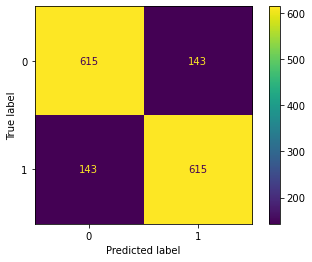

In [33]:
from sklearn.metrics import plot_confusion_matrix, confusion_matrix

plot_confusion_matrix(full_pipeline_log, X_train_under, y_train_under);

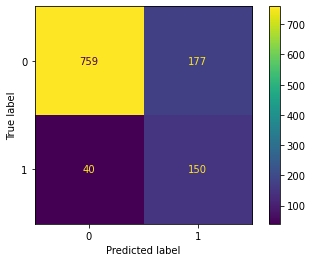

In [34]:
from sklearn.metrics import plot_confusion_matrix, confusion_matrix

plot_confusion_matrix(full_pipeline_log, X_test, y_test);

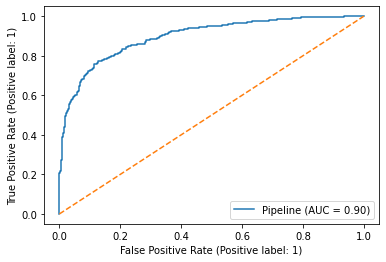

In [35]:
# roc_curve for train
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve

plot_roc_curve(full_pipeline_log, X_train_under, y_train_under)
plt.plot([0, 1], [0, 1], linestyle='--');

we can see the good result from AUC score that is 0.93

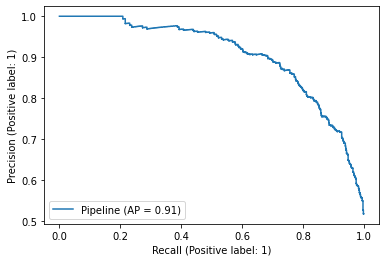

In [36]:
plot_precision_recall_curve(full_pipeline_log, X_train_under, y_train_under);

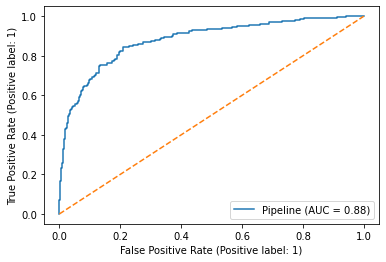

In [37]:
# roc_curve for train
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve

plot_roc_curve(full_pipeline_log, X_test, y_test)
plt.plot([0, 1], [0, 1], linestyle='--');

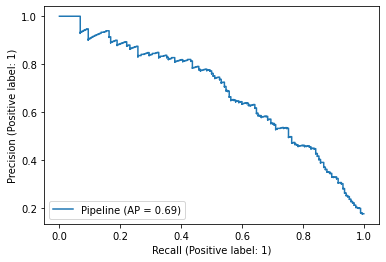

In [38]:
plot_precision_recall_curve(full_pipeline_log, X_test, y_test);

### Hyperparameter Tuning Logistic Regression

We try to Tuning our model to get a better result

In [39]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'log_reg__solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'log_reg__penalty' : ['none', 'l1', 'l2', 'elasticnet'],
    'log_reg__C' : [1,2, 4, 8, 10, 20, 30, 40] 
}

grid_search = GridSearchCV(full_pipeline_log, param_grid, cv=5, n_jobs=-1)

grid_search.fit(X_train_under, y_train_under)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('full_pipeline',
                                        ColumnTransformer(transformers=[('ctg_transformer',
                                                                         OneHotEncoder(),
                                                                         ['PreferredLoginDevice',
                                                                          'PreferredPaymentMode',
                                                                          'Gender',
                                                                          'PreferedOrderCat',
                                                                          'MaritalStatus']),
                                                                        ('num_transformer',
                                                                         RobustScaler(),
                                                                         ['CityTier',
        

In [40]:
log_reg_best = grid_search.best_estimator_
log_reg_best.fit(X_train_under, y_train_under)

Pipeline(steps=[('full_pipeline',
                 ColumnTransformer(transformers=[('ctg_transformer',
                                                  OneHotEncoder(),
                                                  ['PreferredLoginDevice',
                                                   'PreferredPaymentMode',
                                                   'Gender', 'PreferedOrderCat',
                                                   'MaritalStatus']),
                                                 ('num_transformer',
                                                  RobustScaler(),
                                                  ['CityTier',
                                                   'NumberOfDeviceRegistered',
                                                   'SatisfactionScore',
                                                   'NumberOfAddress',
                                                   'CashbackAmount',
                                         

In [41]:
# score after tuning
log_reg_best.fit(X_train_under,y_train_under)

print('Train set:{}'.format(log_reg_best.score(X_train_under,y_train_under)))
print('Test set:{}'.format(log_reg_best.score(X_test,y_test)));

Train set:0.8153034300791556
Test set:0.8126110124333925


#### The results before tuning are even better (Train 82%, Test 80%) than the results after tuning (Train 81%, Test 79%), and most likely, will be the same for all results

In [42]:
# clf report for train
from sklearn.metrics import plot_confusion_matrix, confusion_matrix, classification_report

y_train_log_reg_best = log_reg_best.predict(X_train_under)
clf_report = classification_report(y_train_under,y_train_log_reg_best)
print(clf_report)

              precision    recall  f1-score   support

           0       0.81      0.82      0.82       758
           1       0.82      0.81      0.82       758

    accuracy                           0.82      1516
   macro avg       0.82      0.82      0.82      1516
weighted avg       0.82      0.82      0.82      1516



In [43]:
# clf report for test
from sklearn.metrics import plot_confusion_matrix, confusion_matrix, classification_report

y_test_log_reg_best = log_reg_best.predict(X_test)
clf_report_log_reg = classification_report(y_test, y_test_log_reg_best)
print(clf_report_log_reg)

              precision    recall  f1-score   support

           0       0.95      0.81      0.88       936
           1       0.47      0.81      0.59       190

    accuracy                           0.81      1126
   macro avg       0.71      0.81      0.74      1126
weighted avg       0.87      0.81      0.83      1126



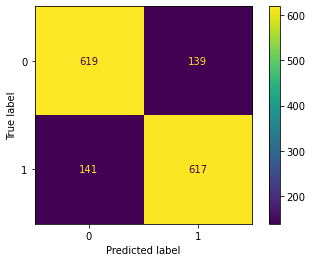

In [44]:
from sklearn.metrics import plot_confusion_matrix, confusion_matrix

plot_confusion_matrix(log_reg_best, X_train_under, y_train_under);

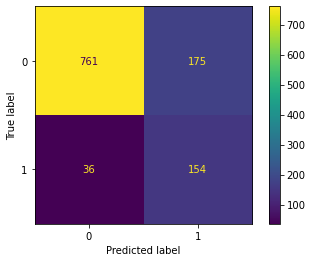

In [45]:
from sklearn.metrics import plot_confusion_matrix, confusion_matrix

plot_confusion_matrix(log_reg_best, X_test, y_test);

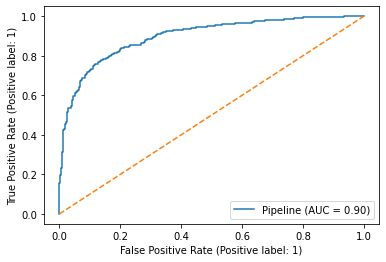

In [46]:
# roc_curve for train
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve

plot_roc_curve(log_reg_best, X_train_under, y_train_under)
plt.plot([0, 1], [0, 1], linestyle='--');

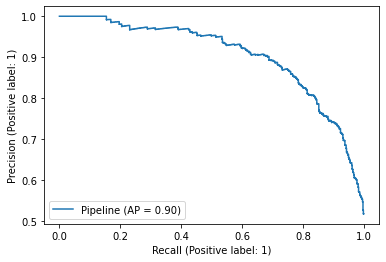

In [47]:
plot_precision_recall_curve(log_reg_best, X_train_under, y_train_under);

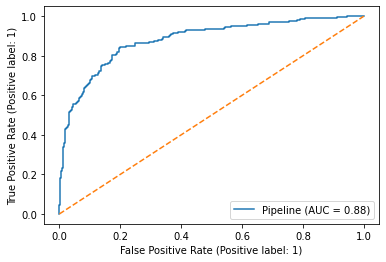

In [48]:
# roc_curve for test

plot_roc_curve(log_reg_best, X_test, y_test)
plt.plot([0, 1], [0, 1], linestyle='--');

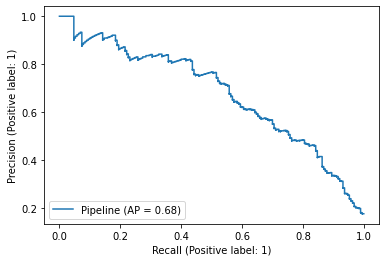

In [49]:
plot_precision_recall_curve(log_reg_best, X_test, y_test);

In [50]:
log_reg_coef = full_pipeline_log.named_steps.log_reg.coef_

feature_name = full_pipeline_log['full_pipeline'].transformers_[0][1].get_feature_names().tolist() + num_cols

df_result_coef = pd.DataFrame({
    'name':feature_name,
    'coef':log_reg_coef.flatten()
})

df_coef = df_result_coef.sort_values('coef')
df_coef

name      coef
28                       Tenure -2.010484
14        x3_Laptop & Accessory -1.579676
25               CashbackAmount -0.801154
16              x3_Mobile Phone -0.734175
3                         x1_CC -0.710300
31            DaySinceLastOrder -0.555746
19                   x4_Married -0.429242
15                    x3_Mobile -0.215935
29  OrderAmountHikeFromlastYear -0.153244
7                 x1_Debit Card -0.146683
9                        x1_UPI -0.123704
1               x0_Mobile Phone -0.111669
2                      x0_Phone -0.103783
6                x1_Credit Card -0.102141
18                  x4_Divorced -0.083566
10                    x2_Female -0.081649
27               HourSpendOnApp  0.028294
11                      x2_Male  0.083420
32         avg_cashbk_per_order  0.142643
12                   x3_Fashion  0.160120
0                   x0_Computer  0.217222
8                   x1_E wallet  0.221404
22     NumberOfDeviceRegistered  0.347955
5           x1_Cash on Delivery  0.354494
13                   x3_Grocery  0.355190
30                   OrderCount  0.399628
26              WarehouseToHome  0.479434
4                        x1_COD  0.508702
20                    x4_Single  0.514579
23            SatisfactionScore  0.580459
24              NumberOfAddress  0.863565
21                     CityTier  0.886154
33                     Complain  1.641866
17                    x3_Others  2.016247

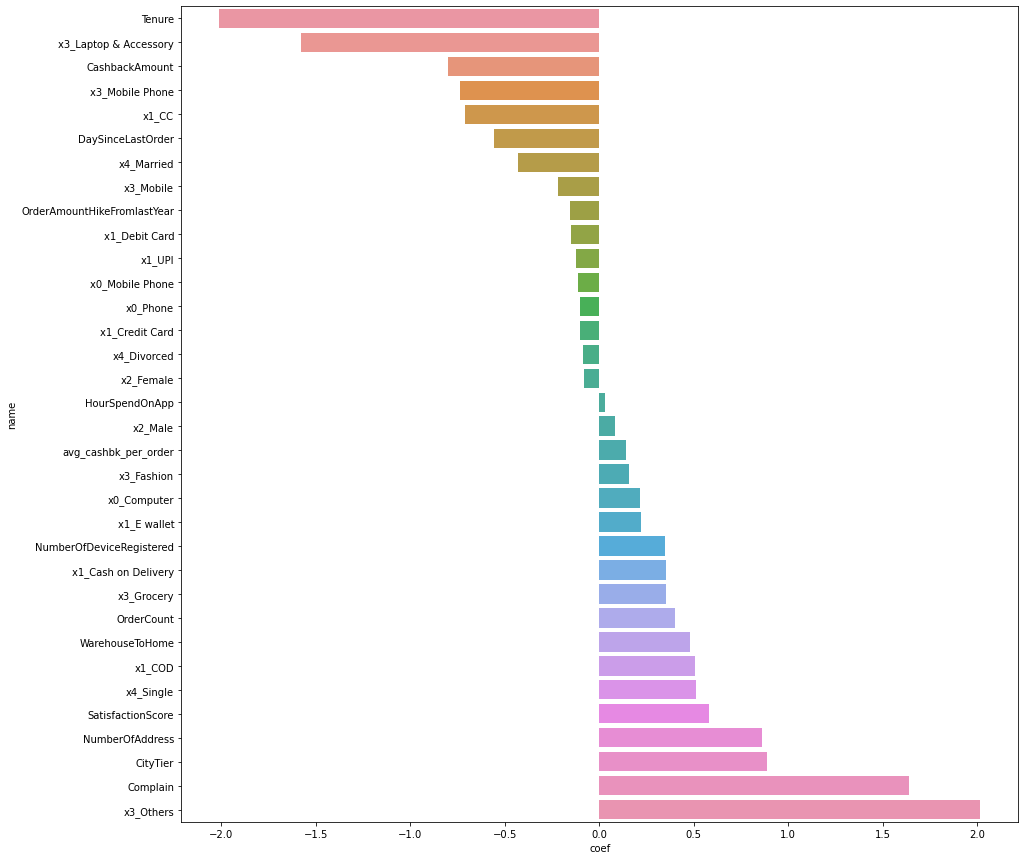

In [51]:
plt.figure(figsize=(15,15))
sns.barplot(data=df_coef,x='coef',y='name');

According to the model, Tenure is negatively contributes to the churn customer, and conversely, complain has positive influence on the customer churn test score, we can see, customer who send a complain tend to be a churn customer. The other most influental variables are from Prefered Order Categorical, there are Laptop & Accessory and Others